In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Sample size
m = 1000

x1 = np.random.uniform(low=-10, high=10, size=(m,1))
x2 = np.random.uniform(-10, 10, (m,1))

X = np.column_stack((x1,x2))

#Add a small random noise to the function
noise = np.random.uniform(-1, 1, (m,1))
bias = 5

#Objective function
actualOutput = 2*x1 - 3*x2 + bias + noise

np.savez('tensor_sample',inputs=X,targets=actualOutput)

### Plotting the raw data

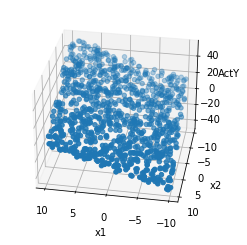

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1.reshape((m,)), x2.reshape((m,)), actualOutput.reshape((m,)))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('ActY')
ax.view_init(azim=100)
plt.show()

### Loading train data

In [4]:
trainData = np.load('tensor_sample.npz')

In [7]:

inputSize = 2 
outputSize = 1
learningRate = 0.02

customOptimizer = tf.keras.optimizers.SGD(learning_rate=learningRate)

#Making nn
model = tf.keras.Sequential([
    tf.keras.layers.Dense(outputSize,
                          kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)),
                          tf.keras.layers.Dropout(.2)
                            ])
model.compile(optimizer=customOptimizer,loss='mean_squared_error')


In [8]:
#Regularization
model.fit(trainData['inputs'],trainData['targets'],epochs=100,verbose=0)